# EY Data Engineer Task

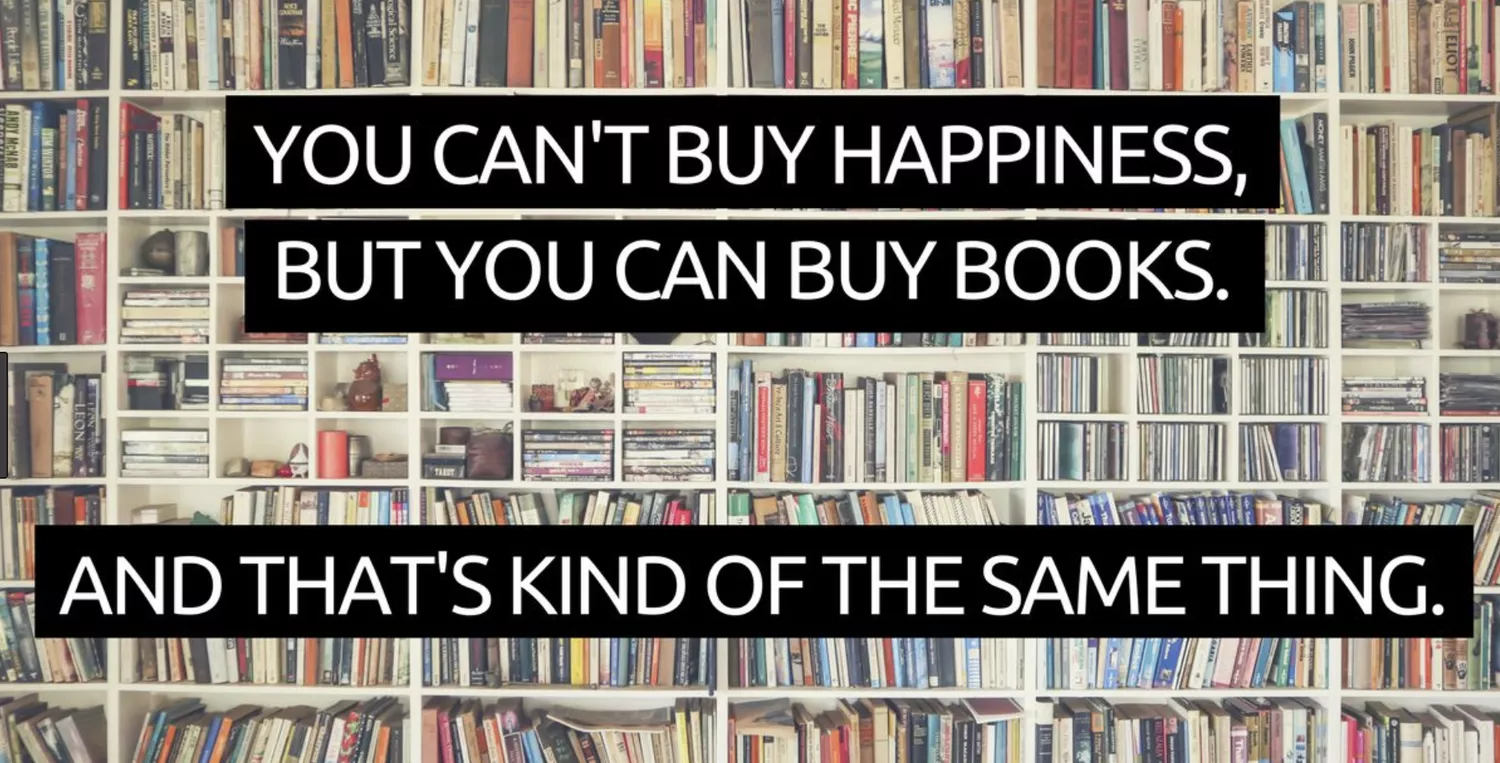

You have won a deal for a new customer called EY Books, who runs a book e-shop in Czechia. At the moment, they would like to expand worldwide, so they are preparing the international version of their webpage. EY Books know the Czech market very well, so they are able to select the most relevant books and most interesting authors for Czech audience for their homepage. However, they do not know what books and authors would be relevant for the international audience. Now it is your job to help them.

Please work on this independently. It is not important to finish everything and do it all perfectly, but you should be able to explain what else you would do if you had more time. At the end you will be asked to present the code and results.

## Task 1: Load and explore CSVs
Firstly, you need to load relevant data. Luckily, there is a dataset ready for you.

1.   Save a copy of this notebook to your Google Disk.
1.   Get data about books and their ratings by users from [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). Read information about the data and download the `CSV Dump` in the bottom of the page.
2.   Upload this data to your Google Drive and attach your Google Drive to this notebook.
3.   Load the data using pandas into dataframes.
4.   Explore the data to get a feeling about it. You can do profiling, visualizations... that's up to you.
5.   Clean the data, if you think it's needed.


In [1]:
import pandas as pd
import os
import html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/")



Mounted at /content/drive


In [3]:
for x in ['BX-Book-Ratings', 'BX-Books', 'BX-Users']:
    with open(f'{x}.csv', mode='r', encoding='latin-1') as f, open(f'{x}-Fixed.csv', 'w', encoding='utf-8-sig') as g:
        content = html.unescape(f.read())
        g.write(content)

In [6]:
os.listdir()
df_books = pd.read_csv('BX-Books-Fixed.csv', delimiter=';', names=range(10), encoding='utf-8-sig')




/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df_books[df_books[8].notnull()]

,0,1,2,3,4,5,6,7,8,9
43666,0330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\""""",Amit Chaudhuri,2001,Pan Macmillan,http://images.amazon.com/images/P/0330482750.0...,http://images.amazon.com/images/P/0330482750.0...,http://images.amazon.com/images/P/0330482750.0...
144057,8423920143,"GuÃ­a del lector del \Quijote\"": Ensayo psicol...","14 : Ensayo)""",Salvador de Madariaga,1976,Espasa-Calpe,http://images.amazon.com/images/P/8423920143.0...,http://images.amazon.com/images/P/8423920143.0...,http://images.amazon.com/images/P/8423920143.0...,NaN
180188,0553570722,"\R\"" for Revenge: Written by Kate William",Created by Francine Pascal (Sweet Valley High...,Francine Pascal,1997,Bantam Books,http://images.amazon.com/images/P/0553570722.0...,http://images.amazon.com/images/P/0553570722.0...,http://images.amazon.com/images/P/0553570722.0...,NaN
209387,085409878X,"\Pie-powder\""","being dust from the law courts,""",John Alderson Foote,1973,EP Publishing,http://images.amazon.com/images/P/085409878X.0...,http://images.amazon.com/images/P/085409878X.0...,http://images.amazon.com/images/P/085409878X.0...,NaN
227932,0006479839,The LaVyrle Spencer Collection: Three Classic...,"\""Forsaking All Others\""","& \""A Promise to Cherish\"")""",LaVyrle Spencer,1995,HarperCollins Publishers,http://images.amazon.com/images/P/0006479839.0...,http://images.amazon.com/images/P/0006479839.0...,http://images.amazon.com/images/P/0006479839.0...
261528,006263545X,Ludwig van Beethoven: Play by Play/Symphony No...,"The \""Egmont\"" Overture""",Alan Rich,1995,Harpercollins,http://images.amazon.com/images/P/006263545X.0...,http://images.amazon.com/images/P/006263545X.0...,http://images.amazon.com/images/P/006263545X.0...,NaN


In [12]:
### Shifting data in DF so everything has 7 Rows. Starting with data going all the way to 9 rows

df_books[[1,2,3]] = df_books[[1,2,3]].astype(str)
df_books.loc[df_books[9].notnull(), 1] = df_books[[1,2,3]].agg(''.join, axis=1)


for n in range(2,8):
    df_books.loc[df_books[9].notnull(), n] = df_books[n+2]
df_books.loc[df_books[9].notnull(), [8,9]] = np.nan
    

In [13]:
### Now data with 8 rows

df_books.loc[df_books[8].notnull(), 1] = df_books[[1,2]].agg(''.join, axis=1)
for n in range(2,7):
    df_books.loc[df_books[8].notnull(), n] = df_books[n+1]

In [14]:
df_books = df_books.drop(columns=[8,9])

In [15]:
### Setting first row as title
df_books.columns = df_books.iloc[0]
df_books = df_books.drop(0, axis=0)
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [17]:
###Loading the remainder data and joining it to have it at one place
df_ratings = pd.read_csv('BX-Book-Ratings-Fixed.csv', encoding='utf-8-sig', delimiter=';')
df_users = pd.read_csv('BX-Users-Fixed.csv', encoding='utf-8-sig', delimiter=';')
df_user_ratings=pd.merge(df_ratings, df_users, on=['User-ID', 'User-ID'], how='left')
df_user_ratings.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [18]:
###Almost 27% of the Age column is Null, I'll ignore this for now, more data might allow more insight for some questions, and we can avoid null values for questions where age matters in the analysis
df_user_ratings['Age'].isnull().sum()/df_user_ratings.shape[0] 


0.2691749726034546

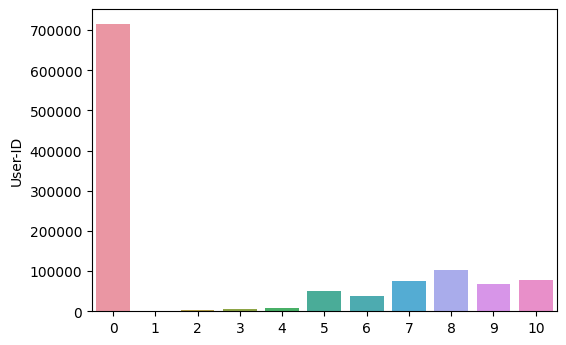

In [19]:
plt.figure(dpi=100)
sns.barplot(data=df_user_ratings, x=np.arange(0,11), y=df_user_ratings.groupby(by='Book-Rating').count()['User-ID'])


In [20]:
### A large amount of the data is actually zeroes, these are not a part of the rating system which is actually 1-10 and thus offers us no value,
### even though it's a significant portion of data, we really don't have much to salvage it from. I'm dropping them

df_user_ratings = df_user_ratings[df_user_ratings['Book-Rating'] != 0]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0, flags=flags)


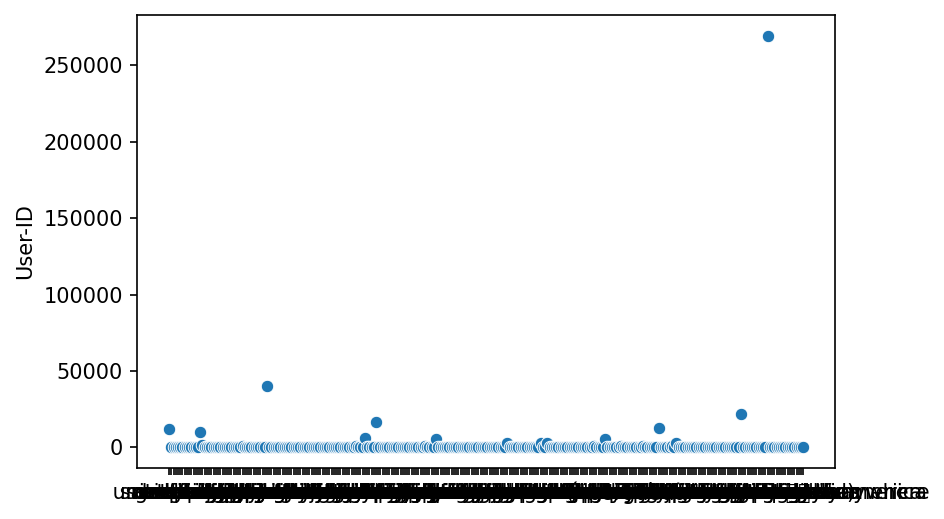

In [22]:
### Creating separate country column for later use
df_user_ratings['Country'] = df_user_ratings['Location'].str.split(',')
df_user_ratings['Country'] = df_user_ratings['Country'].apply(lambda x: x[-1])
df_user_ratings = df_user_ratings[df_user_ratings['Country'].str.contains('/')==False]

plt.figure(dpi=150)
sns.scatterplot(x=df_user_ratings['Country'].unique(), y=df_user_ratings.groupby(by='Country').count()['User-ID'])

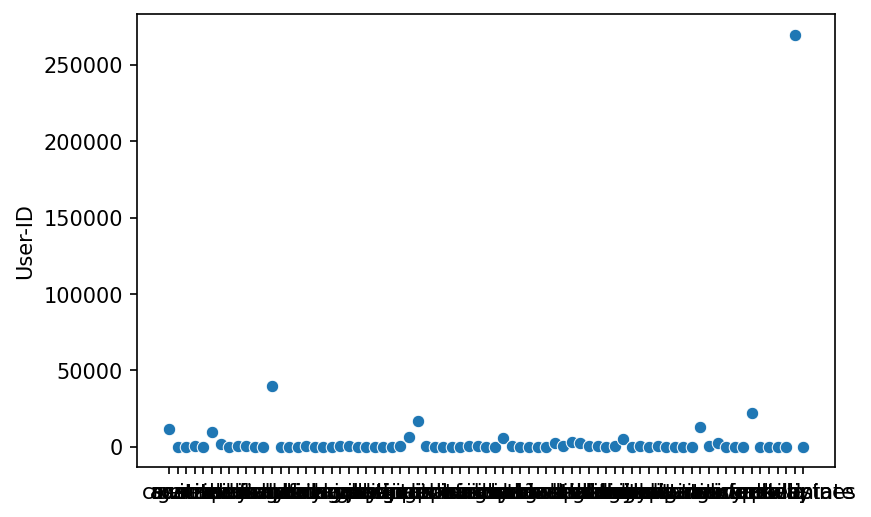

In [24]:
### I clean up the Country column names and then get rid of countries with less than 20 entries. 
### This number is arbitrary, but we can't really assume anything out of such a small sample. Lots of them are typos or differently written country names too. 

df_user_ratings['Country'] = df_user_ratings['Country'].apply(lambda x: ''.join((l for l in x if l.isalnum())))
df_user_ratings = df_user_ratings.groupby('Country').filter(lambda x: x.count()['User-ID'] > 20)
plt.figure(dpi=150)
sns.scatterplot(x=df_user_ratings['Country'].unique(), y=df_user_ratings.groupby(by='Country').count()['User-ID'])


In [25]:
### Now to clean the book df
df_books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [28]:
df_books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [27]:
df_books = df_books[df_books['ISBN'].str.len() == 10]

In [31]:
df_books[df_books['Year-Of-Publication'].apply(lambda x: x in ['DK Publishing Inc', 'Gallimard'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209551,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220745,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221692,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [32]:
for row in [209551, 220745, 221692]:
    
    df_books.iloc[df_books.index.get_loc(row), 2:] = df_books.iloc[df_books.index.get_loc(row), 2:].shift()
    df_books.iloc[df_books.index.get_loc(row), 2] = df_books.iloc[df_books.index.get_loc(row), 1].split('";')[1]
    df_books.iloc[df_books.index.get_loc(row), 1] = df_books.iloc[df_books.index.get_loc(row), 1].split('";')[0]

In [33]:
df_books[df_books['ISBN'].apply(lambda x: x in ['078946697X', '2070426769', '0789466953'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209551,078946697X,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220745,2070426769,"Peuple du ciel, suivi de 'Les Bergers\","Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221692,0789466953,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [34]:
### According to the website the data was collected on 2004, with the benefit of the doubt of books being known to be released a year before, the years up to 2005 might make sense, years afterwards are very unlikely. Because I really want to keep all the books I will replace the years above 2005 with the mode of release, 
# this doesn't give us any valuable info but it lets us keep the data on the books
###
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype('int32')
df_books.loc[df_books['Year-Of-Publication'] > 2005, 'Year-Of-Publication'] = np.nan
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].fillna(int(df_books['Year-Of-Publication'].mode()))

In [35]:
### Year-Of-Publication at 0 is basically NaN, I will make it such, I will not fill in the values, as filling in 4619 rows with mode/mean would probably skew the overall year information quite a lot
df_books[df_books['Year-Of-Publication'] == 0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
177,3150000335,Kabale Und Liebe,Schiller,0.0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
189,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0.0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
289,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0.0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
352,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0.0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
543,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0.0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270814,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0.0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270933,0340571187,Postmens House,Maggie Hemingway,0.0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271114,8427201079,El Misterio De Sittaford,Agatha Christie,0.0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271202,0887781721,Tom Penny,Tony German,0.0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [37]:
df_books.loc[df_books['Year-Of-Publication'] == 0,'Year-Of-Publication'] = np.nan

df_books.loc[df_books['Year-Of-Publication'] < 1600, 'Year-Of-Publication'] = np.nan
df_books[df_books['Year-Of-Publication'] < 1600]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [38]:
df_books.isnull().sum()

0
ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication    4621
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               0
dtype: int64

In [39]:
### Publisher doesn't really matter that much for us, so it's fine leavint it NaN
df_books[df_books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128897,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129044,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


# Task 2: Analytical queries
Now when the data is ready, it's time to provide answers to your customer what should they show on their homepage. Therefore, answer the following questions:

1.   What are the 10 best rated books worldwide?
2.   What are the 10 best rated authors worldwide?
3.   What are the best 10 books published after year 2000?

In [40]:
# The question is quite unspecific, what makes a best rated book? In my case I decided for it to be the books with best average rating out of those with over 100 ratings.
# Good thing to note is that based on this criteria the top 10 books contains 8! Harry Potter Books, two of them being the third book, probably in different editions. 
# I'll print out more results to alleviate this issue for the potential client and give more choice, but the top 10 books are still at index 0-9

ISBN_df = df_user_ratings.groupby('ISBN').filter(lambda x: x.count()['User-ID'] > 99).groupby('ISBN').agg({'Book-Rating': 'mean',
                                     'User-ID': 'count',
                                     'Age':'mean'}).sort_values(by='Book-Rating', ascending=False)
top_10_books = ISBN_df.head(20)



In [41]:
top_10_books.reset_index(inplace=True)
pd.merge(top_10_books,df_books, on=['ISBN', 'ISBN'], how='left')[['Book-Rating', 'Book-Title', 'Book-Author']]

,Book-Rating,Book-Title,Book-Author
0,9.272059,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
1,9.083333,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling
2,9.035461,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling
3,9.029268,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling
4,8.991525,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling
5,8.944954,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
6,8.943925,To Kill a Mockingbird,Harper Lee
7,8.932476,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling
8,8.912000,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
9,8.830769,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN


In [42]:
### Now it's time to find the top 10 authors. For this one I will use weighted average star rating for authors with at least 100 ratings
ISBN_df_2 = df_user_ratings.groupby('ISBN').agg({'Book-Rating': 'mean',
                                     'User-ID': 'count',
                                     'Age':'mean'}).sort_values(by='Book-Rating', ascending=False)

author_df = pd.merge(ISBN_df_2, df_books, on=['ISBN', 'ISBN'], how='left')
author_df['Weighted_Rating'] = author_df['Book-Rating'] * author_df['User-ID']
author_df = author_df.groupby('Book-Author').agg({'Book-Rating': 'mean',
                                     'User-ID': 'sum',
                                     'Age':'mean',
                                     'Weighted_Rating': 'sum'})
author_df = author_df[author_df['User-ID'] > 99]
author_df['Calculated-Rating'] = author_df['Weighted_Rating'] / author_df['User-ID']
author_df.sort_values('Calculated-Rating', ascending=False).head(20)['Calculated-Rating']

Book-Author
Bill Watterson               9.193939
Shel Silverstein             9.185484
Dr. Seuss                    9.171569
Antoine de Saint-ExupÃ©ry    9.041420
Harper Lee                   8.985663
J. K. Rowling                8.971709
Clamp                        8.963303
L.M. MONTGOMERY              8.920561
J.R.R. TOLKIEN               8.895372
E. B. White                  8.844156
Nick Bantock                 8.786164
Anne Frank                   8.780000
Max Lucado                   8.712000
LOIS LOWRY                   8.646341
Frances Hodgson Burnett      8.630573
Gary Larson                  8.628763
DIANA GABALDON               8.624204
Lois McMaster Bujold         8.615942
MITCH ALBOM                  8.605000
J. R. R. Tolkien             8.572899
Name: Calculated-Rating, dtype: float64

In [46]:
# Lastly Top 10 books released after 2020, the logic is pretty much identical to the first Question
books_after_2000 =pd.merge(ISBN_df, df_books, on=['ISBN', 'ISBN'], how='left')
books_after_2000 = books_after_2000[books_after_2000['Year-Of-Publication'].notna()]
books_after_2000['Year-Of-Publication'] = books_after_2000['Year-Of-Publication'].astype('int32')


books_after_2000[books_after_2000['Year-Of-Publication'] > 2000].head(10)[['Year-Of-Publication', 'Book-Title', 'Book-Author', 'Book-Rating']]

,Year-Of-Publication,Book-Title,Book-Author,Book-Rating
1,2001,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,9.083333
3,2003,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,9.029268
5,2002,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,8.944954
21,2002,Seabiscuit: An American Legend,LAURA HILLENBRAND,8.470588
22,2003,The Secret Life of Bees,Sue Monk Kidd,8.457516
23,2003,The Da Vinci Code,Dan Brown,8.429752
25,2002,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,8.405229
28,2002,Nickel and Dimed: On (Not) Getting By in America,Barbara Ehrenreich,8.253731
32,2002,The Lovely Bones: A Novel,Alice Sebold,8.189802
33,2002,Lucky : A Memoir,Alice Sebold,8.181818


## Task 3: Git
Once you are satisfied with your result, create a new GitHub repository and upload there this notebook. Make at least one Pull Request with changes to your code here.

## Task 4: Database
Now that you have relevant answers, you need to deliver them to your client. However, EY Books have never heard of Python nor pandas dataframes, their eshop is running on Java and their data is stored in an Oracle database. You need to store the data in their database so that they can integrate your solution.

1.   Create database `worldwide_<firstname_lastname>` 
2.   Create tables `books`, `authors` and `books_2000` within your database using your results from previous tasks.
3.   Test that your database works using some SQL queries.

In [ ]:
# Use these credentials for connecting to the DB:
DIALECT = 'oracle'
SQL_DRIVER = 'cx_oracle'
USERNAME = # use your credentials
PASSWORD = # use your credentials
HOST = '86.105.155.230'
PORT = 1521
SERVICE = 'XEPDB1'
ENGINE_PATH_WIN_AUTH = DIALECT + '+' + SQL_DRIVER + '://' + USERNAME + ':' + PASSWORD +'@' + HOST + ':' + str(PORT) + '/?service_name=' + SERVICE
print(ENGINE_PATH_WIN_AUTH)

# Write your solution here

## Task 5: API
EY Books would now like to personalize customer experience. When a customer creates an account, they tell EY Books their sex and age. So EY Books would like to customize the shown homepage according to these features.

1. Load *all* the user data from API
  - There are these endpoints:
  1. Fetch the data
    - URL: `https://adap-eu-acad-fa-dev.azurewebsites.net/api/get_users_pii`
    - Parameter `code` (authentication code): `D4a88zNHfHcQx8Eokf-JkXFd2qRbEb9ms3PdCvGaDTZVAzFuI1IbAA==`
      - Parameter `number_of_rows` specifies how many rows you want to fetch (e.g. `10000` to read ten thousand rows, feel free to try how many rows it is possible to read)
      - Parameter `starting_row` specifies the number of row from which you 
      want to start reading (e.g. `1` to read from the beginning of the dataset) 
  1. Get the total number of rows in the user dataset
    - URL: `https://adap-eu-acad-fa-dev.azurewebsites.net/api/get_max_rows`
    - Parameter `code`: `8wiDQnSGCGVFvnEMwGuF8eq8Y5DM2R-4sZGEovOmOb0SAzFuPI7Gew==`
2.   Prepare dataframe(s), that contains best 10 books and authors depending on sex and age.

In [ ]:
# Write your solution here

## Task 6: Python functions
EY Books would like to further personalize customer experience, also taking into account the country from which the customer is.


1.   Prepare python functions, that give you 10 best books and 10 best authors depending on customer age, sex, and country.
2.   Test, whether these functions give a meaningfully-looking list of books for you personally (your age group..).

When you are done, upload your final solution to GitHub.

In [ ]:
# Write your solution here

# Task 7: Bonus

Bonuses: 
1. From which country is the most popular author of books published after the year 2000?
2. Plot a graph with a top author per country for 2 arbitrary chosen age groups (ex. millenials - born 2000-2010) of boys/girls.

Any part of solution or comments from your side should be again uploaded to GitHub.

In [ ]:
# Write your solution here

*Have a nice coding! :-)*